In [69]:
import pandas as pd
import numpy as np
from deepplot import ROC_threshold, Roc_Auc_Plot, classification_evaluation

In [70]:
train_df = pd.read_csv('./data/train_results.csv')
test_df = pd.read_csv('./data/test_results.csv')
extest_df = pd.read_csv('./data/extest_results.csv')

In [71]:
train_df.columns

Index(['Unnamed: 0', 'train_pid', 'train_label', 'train_pred'], dtype='object')

In [72]:
train_y_score = train_df['train_pred']
train_y_true = train_df['train_label']
train_thre = ROC_threshold(train_y_true, train_y_score)[0]
print(train_thre)

0.590047440347932


In [73]:
test_y_score = np.array(test_df['test_pred'])
test_y_true = test_df['test_label']
test_thre = ROC_threshold(test_y_true, test_y_score)
print(test_thre)

(0.842723802056964, [0.041666666666666664, 0.7608695652173914])


In [74]:
extest_y_score = np.array(extest_df['extest_pred'])
extest_y_true = extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)
print(extest_thre)

(0.797049258631667, [0.21052631578947367, 0.7692307692307693])


In [75]:
extest_y_score = np.array(extest_df['extest_pred'])
extest_y_true = extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)[0]
print(extest_thre)

0.797049258631667


In [76]:
train_y_pred = train_y_score > train_thre
test_y_pred = test_y_score > train_thre
extest_y_pred = extest_y_score > train_thre 
print(test_y_pred)

[False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True False  True False False  True  True False False  True False
  True False False False  True  True  True  True False  True]


In [77]:
train_results = pd.DataFrame({'y_true':train_y_true, 'y_pred':train_y_pred, 'y_score':train_y_score})
test_results = pd.DataFrame({'y_true':test_y_true, 'y_pred':test_y_pred, 'y_score':test_y_score})
extest_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})
test_results.head()

,y_true,y_pred,y_score
0,1,False,0.542707
1,1,True,0.898674
2,1,True,0.961153
3,1,True,0.946710
4,1,True,0.994180


In [78]:
train_results.to_csv('./train.csv',index=0)
test_results.to_csv('./test.csv',index=0)
extest_results.to_csv('./extest.csv',index=0)
results_list = ['./train.csv','./test.csv', './extest.csv']

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

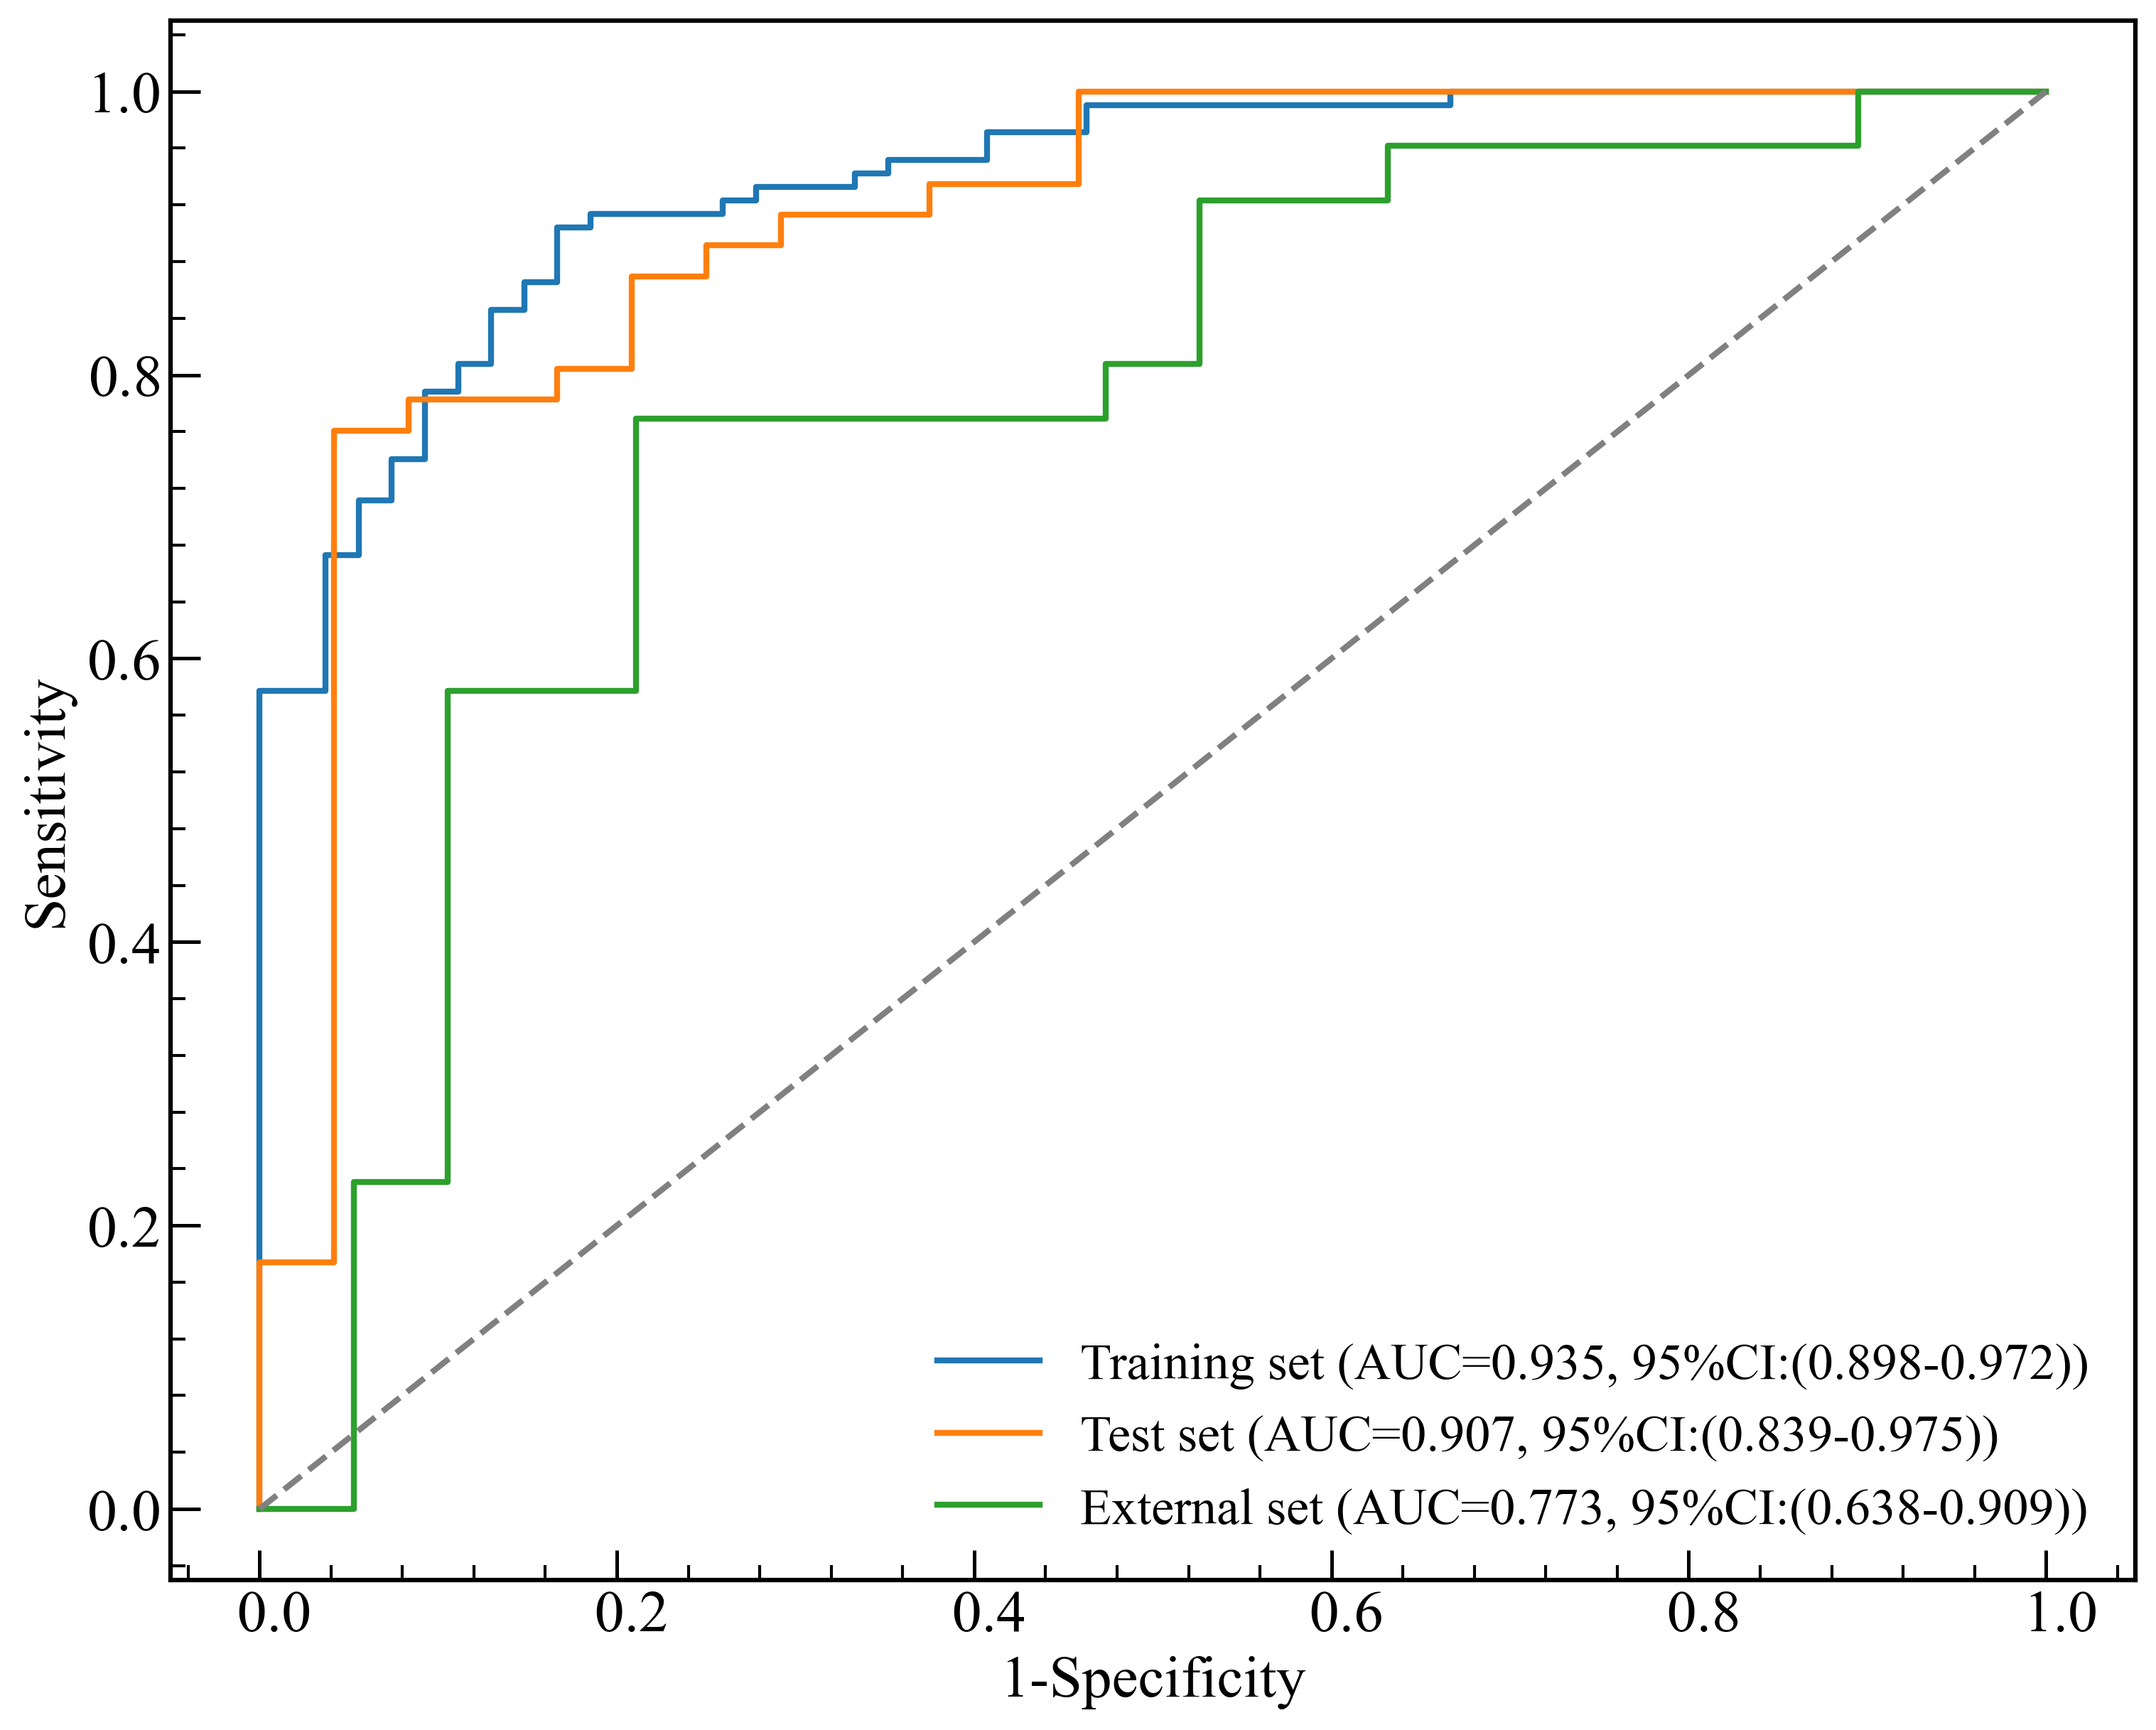

In [79]:
Roc_Auc_Plot(results_list, legends=['Training set', 'Test set', 'External set'])

In [80]:
print(extest_y_score)
print(np.array(extest_y_true))
print({x:y for x, y in zip(extest_y_score,np.array(extest_y_true))})

[0.56819541 0.01304699 0.29254769 0.9066474  0.97046574 0.13348568
 0.98764111 0.99508374 0.99422544 0.84749259 0.98823305 0.67864218
 0.98262121 0.83782903 0.99385834 0.00652287 0.74158009 0.79704926
 0.87403295 0.84126306 0.93599539 0.92357064 0.082665   0.98183333
 0.12544466 0.95346506 0.88160639 0.40292818 0.98631376 0.13188559
 0.79260821 0.17435813 0.3604155  0.92624811 0.35569402 0.97361562
 0.36268989 0.96181851 0.43288258 0.655755   0.15485912 0.89841462
 0.57664433 0.21975823 0.94029718]
[1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 1 1]
{0.568195407134682: 1, 0.0130469941496642: 0, 0.292547685472281: 0, 0.906647403362824: 1, 0.970465743110309: 1, 0.133485682020924: 0, 0.987641105416401: 1, 0.995083737346851: 0, 0.994225444692616: 1, 0.847492591438891: 1, 0.988233045902117: 1, 0.678642179495166: 0, 0.982621212108602: 1, 0.837829032156864: 1, 0.993858339989114: 1, 0.0065228736121144: 0, 0.741580093893169: 0, 0.797049258631667: 1, 0.87

In [81]:
classification_evaluation(extest_y_true, extest_y_pred, extest_y_score)

{'auc': 0.7732793522267206,
 'auc_CI': [0.6377646093201372, 0.908794095133304],
 'sensitivity(recall)': 0.7692307692307693,
 'specificity': 0.5789473684210527,
 'accuracy': 0.6888888888888889,
 'precision': 0.7142857142857143,
 'f1': 0.7407407407407408}